In [1]:
import pandas as pd
import numpy as np

## Removing constant features using VarianceThreshold

In [8]:
data=pd.DataFrame({"A":[1,2,3,4,5,6],
                 "B":[8,9,10,11,12,13],
                 "C":[1,1,1,1,1,1],
                 "D":[0,0,0,0,0,0]})

In [9]:
data.head()

,A,B,C,D
0,1,8,1,0
1,2,9,1,0
2,3,10,1,0
3,4,11,1,0
4,5,12,1,0


In [10]:
from sklearn.feature_selection import VarianceThreshold
var_thre=VarianceThreshold(threshold=0)
var_thre.fit(data)

VarianceThreshold(threshold=0)

In [11]:
var_thre.get_support()

array([ True,  True, False, False])

In [12]:
data.columns[var_thre.get_support()]

Index(['A', 'B'], dtype='object')

In [13]:
constant_columns=[column for column in data.columns
                 if column not in data.columns[var_thre.get_support()]]

In [14]:
constant_columns

['C', 'D']

In [15]:
data.drop(constant_columns,axis=1)

,A,B
0,1,8
1,2,9
2,3,10
3,4,11
4,5,12
5,6,13


Satandar dataset

In [20]:
satandar_data=pd.read_csv('Data/Satander_Data.csv',nrows=10000)

In [21]:
satandar_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [23]:
satandar_data.shape

(10000, 371)

In [25]:
satander_var_thre=VarianceThreshold(threshold=0)

In [26]:
satander_var_thre.fit(satandar_data)

VarianceThreshold(threshold=0)

In [28]:
sum(satander_var_thre.get_support())

286

In [30]:
X=satandar_data.drop(labels='TARGET',axis=1)
y=satandar_data['TARGET']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [36]:
X_train.shape

(7000, 370)

In [38]:
satander_var_thre.fit(X_train)

VarianceThreshold(threshold=0)

In [41]:
sum(satander_var_thre.get_support())

284

In [45]:
satander_constant_columns=[column for column in X_train.columns
                          if column not in X_train.columns[satander_var_thre.get_support()]]

In [46]:
satander_constant_columns

['ind_var2_0',
 'ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_out_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_var7_emit_ult1',
 

In [47]:
X_train1=X_train.drop(satander_constant_columns,axis=1)

In [48]:
X_train1.shape

(7000, 284)

# Feature selection using corelation

In [50]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MEDV']=data.target

In [55]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
X=df.drop('MEDV', axis=1)
y=df['MEDV']

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [60]:
X_train.shape,X_test.shape

((354, 13), (152, 13))

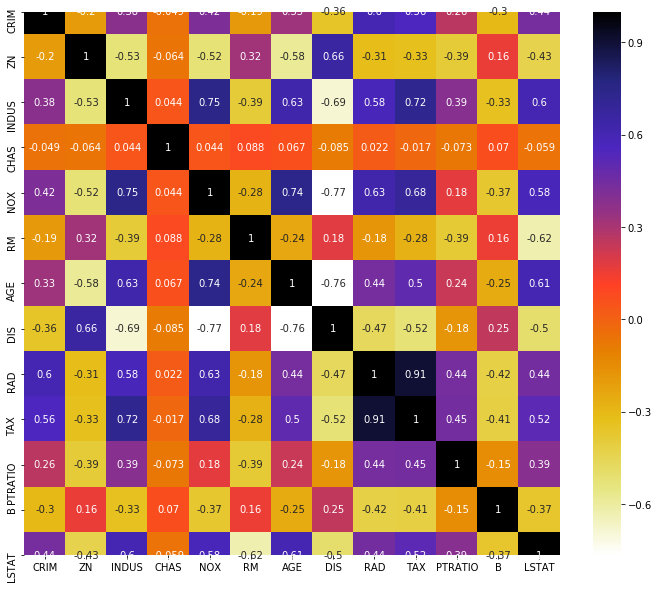

In [69]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [71]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [72]:
corr_features=correlation(X_train,0.7)

In [73]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [74]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


In [75]:
X_train.shape,X_test.shape

((354, 13), (152, 13))

# Information Gain - Mutual Information gain in Classification problems

In [76]:
dataset_wine=pd.read_csv('Data/wine.csv')

In [79]:
dataset_wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [81]:
dataset_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [85]:
X_train, X_test, y_train, y_test=train_test_split(dataset_wine.drop('Wine',axis=1),dataset_wine['Wine'],test_size=0.3, random_state=0)

In [94]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information

mutual_info=mutual_info_classif(X_train,y_train)

In [95]:
mutual_info

array([0.42322127, 0.29193531, 0.16914085, 0.26921786, 0.1584276 ,
       0.47121737, 0.71873372, 0.11919793, 0.27039003, 0.62552921,
       0.59527641, 0.5545528 , 0.53023924])

In [97]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.718734
Color.int               0.625529
Hue                     0.595276
OD                      0.554553
Proline                 0.530239
Phenols                 0.471217
Alcohol                 0.423221
Malic.acid              0.291935
Proanth                 0.270390
Acl                     0.269218
Ash                     0.169141
Mg                      0.158428
Nonflavanoid.phenols    0.119198
dtype: float64

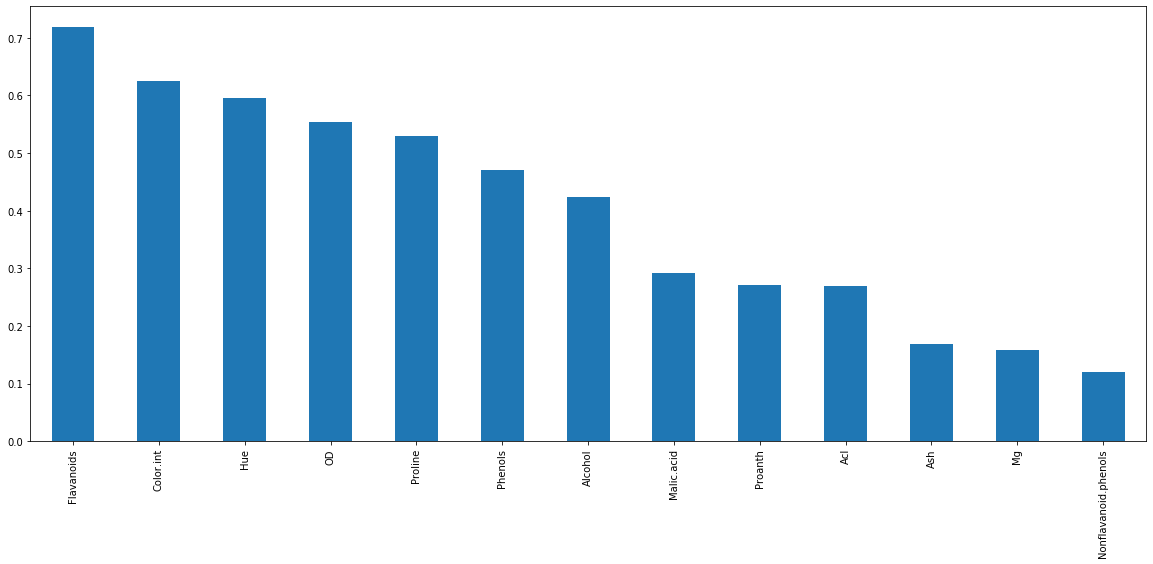

In [100]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

Selecting the top 5 features

In [101]:
from sklearn.feature_selection import SelectKBest

In [109]:
sel_five_columns=SelectKBest(mutual_info_classif,k=5)

In [110]:
sel_five_columns.fit(X_train,y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x00000240FC772318>)

In [111]:
sel_five_columns.fit(X_train,y_train)
X_train.columns[sel_five_columns.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

# Mutual Information w.r.t Regression problem

In [112]:
data_housing=pd.read_csv('Data\HousePrice.csv')

In [114]:
data_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
data_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [121]:
data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [123]:
num_list=['int16','int32','int64','float16','float32','float64']
numerical_cols=list(data_housing.select_dtypes(include=num_list).columns)

In [125]:
housing_df=data_housing[numerical_cols]

In [126]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [127]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [128]:
housing_df.drop("Id",axis=1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [129]:
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=["SalePrice"],axis=1),housing_df['SalePrice'],test_size=0.3,random_state=0)

In [133]:
X_train.shape


(1022, 37)

In [135]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [137]:
from sklearn.feature_selection import mutual_info_regression

In [138]:
mutual_info=mutual_info_regression(X_train.fillna(0),y_train)

In [139]:
mutual_info

array([0.00000000e+00, 2.56655905e-01, 2.19399944e-01, 1.64547866e-01,
       5.25195349e-01, 1.11406352e-01, 3.48638509e-01, 2.41824556e-01,
       1.03951786e-01, 1.59527304e-01, 5.74023263e-03, 1.12102568e-01,
       3.82897851e-01, 3.13857503e-01, 2.27878726e-01, 0.00000000e+00,
       4.83558877e-01, 3.05138332e-02, 0.00000000e+00, 2.69089697e-01,
       7.65462092e-02, 4.90181345e-02, 1.89436514e-02, 1.82416544e-01,
       1.69361914e-01, 2.63417442e-01, 3.50860166e-01, 3.65467862e-01,
       6.72394630e-02, 1.68313477e-01, 1.08008192e-02, 6.49537112e-03,
       1.00915506e-02, 5.28431604e-03, 0.00000000e+00, 0.00000000e+00,
       4.74365145e-04])

In [142]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.525195
GrLivArea        0.483559
TotalBsmtSF      0.382898
GarageArea       0.365468
GarageCars       0.350860
YearBuilt        0.348639
1stFlrSF         0.313858
FullBath         0.269090
GarageYrBlt      0.263417
MSSubClass       0.256656
YearRemodAdd     0.241825
2ndFlrSF         0.227879
LotFrontage      0.219400
TotRmsAbvGrd     0.182417
Fireplaces       0.169362
OpenPorchSF      0.168313
LotArea          0.164548
BsmtFinSF1       0.159527
BsmtUnfSF        0.112103
OverallCond      0.111406
MasVnrArea       0.103952
HalfBath         0.076546
WoodDeckSF       0.067239
BedroomAbvGr     0.049018
BsmtFullBath     0.030514
KitchenAbvGr     0.018944
EnclosedPorch    0.010801
ScreenPorch      0.010092
3SsnPorch        0.006495
BsmtFinSF2       0.005740
PoolArea         0.005284
YrSold           0.000474
MiscVal          0.000000
MoSold           0.000000
Id               0.000000
LowQualFinSF     0.000000
BsmtHalfBath     0.000000
dtype: float64

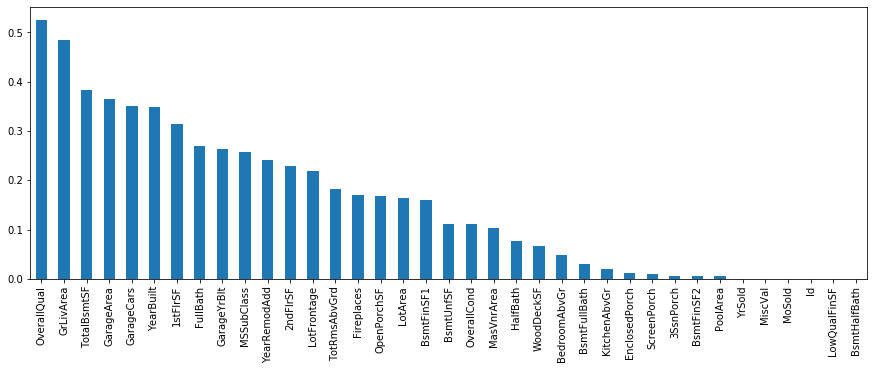

In [143]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [144]:
from sklearn.feature_selection import SelectPercentile

In [146]:
selected_top_columns=SelectPercentile(mutual_info_regression,percentile=20)
selected_top_columns.fit(X_train.fillna(0),y_train)
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea'],
      dtype='object')

# Chi Square Test for Feature selection

In [184]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [185]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [154]:
#['Sex','emarked','alone','pclass','Survived']

In [186]:
df1=df[['sex','embarked','alone','pclass','survived']]

In [187]:
df1

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0
...,...,...,...,...,...
886,male,S,True,2,0
887,female,S,True,1,1
888,female,S,False,3,0
889,male,C,True,1,1


In [188]:
np.where(df1['sex']=='male',1,0)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

Needs to apply lable encoding before the chi square test

In [189]:
#label encoding on 'sex'
df1['sex']=np.where(df1['sex']=='male',1,0)

# label encoding on embarked

ordinal_label={k:i for i, k in enumerate(df['embarked'].unique(),0)}
df1['embarked']=df1['embarked'].map(ordinal_label)

C:\Users\ajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [190]:
#label encoding on 'alone'
df1['alone']=np.where(df1['alone']==True,1,0)

C:\Users\ajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [191]:
#train test split in order to avoid overfitting

X_train,X_test, y_train,y_test=train_test_split(df1[['sex','embarked','alone','pclass']],df1['survived'],test_size=0.3, random_state=42)


In [192]:
df1['sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int32

In [193]:
X_train.head()

,sex,embarked,alone,pclass
445,1,0,0,1
650,1,0,1,3
172,0,0,0,3
450,1,0,0,2
314,1,0,0,2


In [194]:
df1['sex'].unique()

array([1, 0])

In [195]:
#Perform chi squre test
#chi2 returns two values such as FScore and P Value

from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [197]:
f_p_values

(array([60.41964418, 11.363384  ,  8.35778435, 17.40807208]),
 array([7.66442567e-15, 7.49062219e-04, 3.84038546e-03, 3.01542662e-05]))

In [198]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns

In [199]:
p_values

sex         7.664426e-15
embarked    7.490622e-04
alone       3.840385e-03
pclass      3.015427e-05
dtype: float64

In [200]:
p_values.sort_index(ascending=False)

sex         7.664426e-15
pclass      3.015427e-05
embarked    7.490622e-04
alone       3.840385e-03
dtype: float64

In [ ]:
#Observation
# 'Sex' column is the most important column when compared to output features Survived.

